<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #2f0000ff, #690202ff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Lab 3 Day 21/8
    </h1>
</div>


<h4 style="color:#6c0e0eff">1. Importing the Fashion-MNIST Dataset Using TensorFlow Keras</h4>

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

<h4 style="color:#6c0e0eff">2. Loading the Fashion-MNIST Dataset into Training and Testing Sets</h4>

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


<h4 style="color:#6c0e0eff">3. Displaying the Training Labels of the Fashion-MNIST Dataset</h4>

In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<h4 style="color:#6c0e0eff">4. Defining Class Names for the Fashion-MNIST Dataset</h4>

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<h4 style="color:#6c0e0eff">5. Checking the Shape of Training Images in the Fashion-MNIST Dataset</h4>

In [5]:
train_images.shape

(60000, 28, 28)

<h4 style="color:#6c0e0eff">6. Checking the Shape of testing Images in the Fashion-MNIST Dataset</h4>

In [6]:
test_images.shape

(10000, 28, 28)

<h4 style="color:#6c0e0eff">7. Visualizing a Sample Image from the Fashion-MNIST Training Set with Its Class Label</h4>

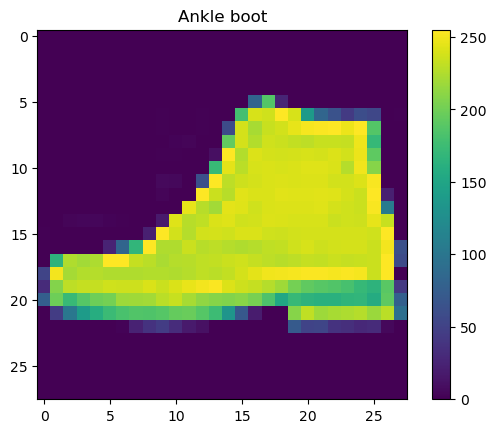

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

<h4 style="color:#6c0e0eff">8. Normalizing Fashion-MNIST Training and Testing Images by Scaling Pixel Values to [0,1]</h4>

In [8]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
train_images = train_images/255.0
test_images = test_images/255.0

<h4 style="color:#6c0e0eff">9. Visualizing a Grid of Sample Images from the Fashion-MNIST Training Set with Class Labels</h4>

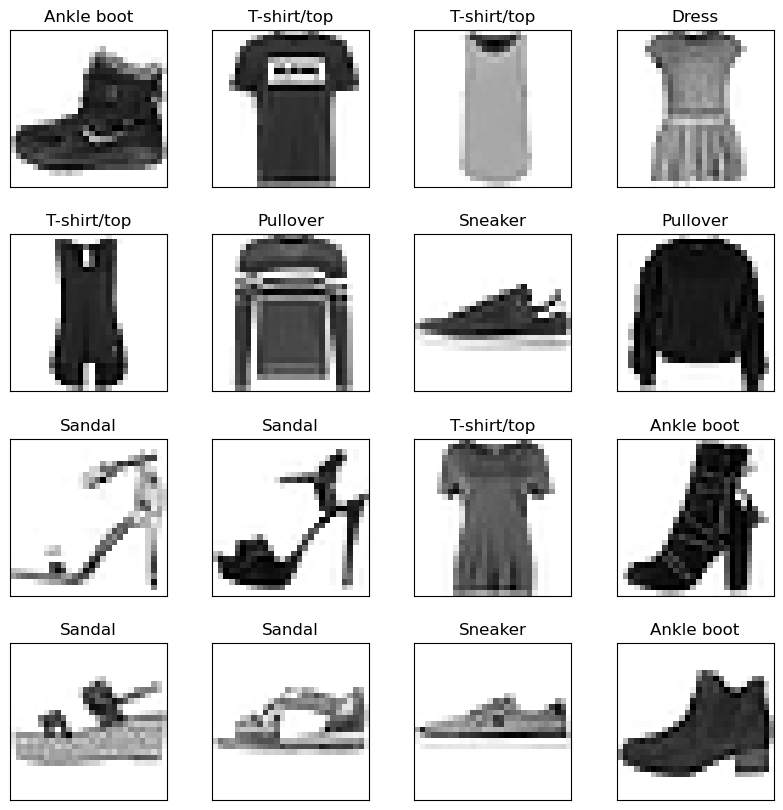

In [9]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

<h4 style="color:#6c0e0eff">10. Reshaping Fashion-MNIST Images into 4D Tensors for CNN Input</h4>

In [10]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)

(60000, 28, 28, 1)


The first dimension is the number of samples


---
The fourth dimension is the appended one representing the grayscale images


<h4 style="color:#6c0e0eff">11. Building and Compiling a CNN Model for Fashion-MNIST Classification with Convolution, Pooling, and Dense Layers</h4>

In [11]:
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss=losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

c:\Users\Rammah\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h4 style="color:#6c0e0eff">12. Displaying the Summary of the CNN Model Architecture for Fashion-MNIST</h4>

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

The benefits of applying pooling are:


1.   avoiding overfitting
2.   Reducing training cost



<h4 style="color:#6c0e0eff">13. Training the CNN Model on Fashion-MNIST with Validation Split and Custom Batch Size</h4>

In [13]:
model.fit(X_train, train_labels, validation_split=0.15, epochs=10, batch_size= 256) 

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7346 - loss: 0.7300 - val_accuracy: 0.7952 - val_loss: 0.5743
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8402 - loss: 0.4389 - val_accuracy: 0.8381 - val_loss: 0.4490
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8669 - loss: 0.3708 - val_accuracy: 0.8573 - val_loss: 0.4005
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8817 - loss: 0.3282 - val_accuracy: 0.8751 - val_loss: 0.3572
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8928 - loss: 0.2989 - val_accuracy: 0.8820 - val_loss: 0.3359
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8997 - loss: 0.2778 - val_accuracy: 0.8908 - val_loss: 0.3111
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9056 - loss: 0.2611 - val_accuracy: 0.8974 - val_loss: 0.2929
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9114 - loss: 0.2457 - val_accu

<h4 style="color:#6c0e0eff">14. Evaluating the CNN Model on the Fashion-MNIST Test Set and Printing Accuracy</h4>

In [14]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9019 - loss: 0.2810
Accuracy on test set:  0.9018999934196472


<h4 style="color:#6c0e0eff">15. Generating Predictions for the Fashion-MNIST Test Set and Displaying the First Output Vector</h4>

In [15]:
predictions = model.predict(X_test)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.0117482e-06 3.7337852e-11 5.2055389e-06 1.9870146e-08 1.4650257e-09
 4.7133598e-04 5.0234998e-09 1.7401021e-03 5.0833302e-07 9.9778169e-01]


<h4 style="color:#6c0e0eff">16. Displaying the Predicted Class Label for the First Fashion-MNIST Test Sample</h4>

In [16]:
import numpy as np
print('Predicted label for the first test sample: ', np.argmax(predictions[0]))

Predicted label for the first test sample:  9


<h4 style="color:#6c0e0eff">17. Displaying the True Class Label for the First Fashion-MNIST Test Sample</h4>

In [17]:
print('True label for the first test sample: ', test_labels[0])

True label for the first test sample:  9


<h4 style="color:#6c0e0eff">18. Defining a Function to Visualize an Image with Its True and Predicted Label Probabilities</h4>

In [18]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

<h4 style="color:#6c0e0eff">19. Visualizing the First Test Image with Its Predicted and True Label Probabilities</h4>

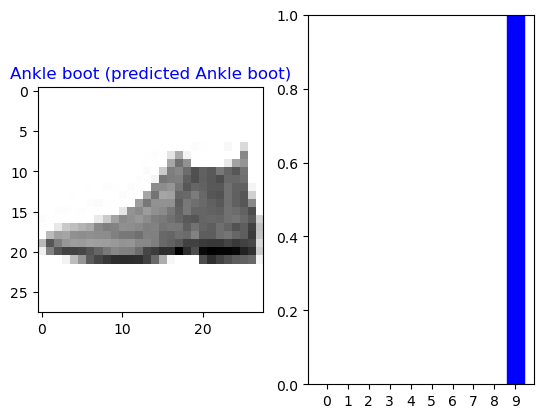

In [19]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)

<h4 style="color:#6c0e0eff">20. Inspecting the Shape of Weights in the Second Convolutional Layer of the CNN Model</h4>

In [20]:
model.layers[2].get_weights()[0].shape

(3, 3, 32, 64)

<h4 style="color:#6c0e0eff">21. Normalizing the Filters of the Second Convolutional Layer for Visualization</h4>

In [21]:
filters, _ = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max-f_min)

<h4 style="color:#6c0e0eff">22. Visualizing the First 32 Filters from the Second Convolutional Layer of the CNN</h4>

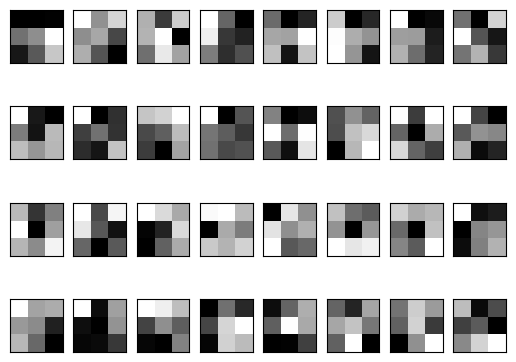

In [22]:
n_filters = 32
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:, :, 0], cmap='gray')

plt.show()

<h4 style="color:#6c0e0eff">23. Reducing the Training Dataset to 500 Samples for Data Augmentation</h4>

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
X_train = X_train[:n_small]
train_labels = train_labels[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


<h4 style="color:#6c0e0eff">24. Building a Simplified CNN Model with Two Convolutional Layers and Dense Classifier for Fashion-MNIST</h4>

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

<h4 style="color:#6c0e0eff">25. Compiling the Simplified CNN Model with Adam Optimizer and Sparse Categorical Crossentropy Loss</h4>

In [25]:
model.compile(optimizer='adam',
            loss=losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

<h4 style="color:#6c0e0eff">26. Training the Simplified CNN Model on a Reduced Fashion-MNIST Dataset with Validation</h4>

In [26]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=20, batch_size=40)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3740 - loss: 1.9098 - val_accuracy: 0.5303 - val_loss: 1.3794
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6180 - loss: 1.0981 - val_accuracy: 0.6667 - val_loss: 0.9575
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7280 - loss: 0.8028 - val_accuracy: 0.7079 - val_loss: 0.8363
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7440 - loss: 0.6877 - val_accuracy: 0.7117 - val_loss: 0.7730
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7720 - loss: 0.6398 - val_accuracy: 0.7128 - val_loss: 0.7483
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8100 - loss: 0.5253 - val_accuracy: 0.7413 - val_loss: 0.6773
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8460 - loss: 0.4393 - val_accuracy: 0.7643 - val_loss: 0.6336
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8540 - loss: 0.3878 - val_accuracy: 0.7722 - v

<h4 style="color:#6c0e0eff">26. Evaluating the Simplified CNN Model on the Fashion-MNIST Test Set and Printing Accuracy</h4>

In [27]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7970 - loss: 0.7782
Accuracy on test set: 0.796999990940094


The accuracy  without augmentation has a classification accuracy of 79.5%

<h4 style="color:#6c0e0eff">27. Creating an ImageDataGenerator for Data Augmentation with Height Shift and Horizontal Flip</h4>

In [28]:
datagen = ImageDataGenerator(height_shift_range=3,horizontal_flip=True)

<h4 style="color:#6c0e0eff">28. Cloning and Compiling the CNN Model for Training with Data Augmentation</h4>

In [29]:
model_aug = tf.keras.models.clone_model(model)
model_aug.compile(optimizer='adam',loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])

<h4 style="color:#6c0e0eff">29. Training the Augmented CNN Model Using ImageDataGenerator with Validation on Test Set</h4>

In [30]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=40)

model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50


c:\Users\Rammah\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2980 - loss: 2.0154 - val_accuracy: 0.4588 - val_loss: 1.4597
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5060 - loss: 1.3266 - val_accuracy: 0.5872 - val_loss: 1.1315
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6300 - loss: 1.0640 - val_accuracy: 0.6485 - val_loss: 0.9476
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6740 - loss: 0.9276 - val_accuracy: 0.6754 - val_loss: 0.9195
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7380 - loss: 0.7860 - val_accuracy: 0.7261 - val_loss: 0.8118
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7700 - loss: 0.7097 - val_accuracy: 0.6953 - val_loss: 0.9165
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7840 - loss: 0.6716 - val_accuracy: 0.7455 - val_loss: 0.7451
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7920 - loss: 0.6214 - val_accuracy: 0.7456 - val_loss: 0.

<h4 style="color:#6c0e0eff">30. Evaluating the Augmented CNN Model on the Fashion-MNIST Test Set and Printing Accuracy</h4>

In [31]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.7793 - loss: 1.0343
Accuracy on test set:  0.7792999744415283
